# Problem Statement: PredCatch Analytics' Australian banking client's profitability and reputation are being hit by fraudulent ATM transactions. They want PredCatch to help them in reducing and if possible completely eliminating such fraudulent transactions. PredCatch believes it can do the same by building a predictive model to catch such fraudulent transactions in real time and decline them. Your job as PredCatch's Data Scientist is to build this fraud detection & prevention predictive model in the first step. If successful, in the 2nd step you will have to present your solutions and explain how it works to the client. The data has been made available to you. To give more edge to the solution they have also collected data regarding location [geo_scores] of the transactions, their own proprietary index [Lambda_wts], on network turn around times [Qset_tats] and vulnerability qualification score [instance_scores]. As of now you don't need to understand what they mean.

## Training data contains masked variables pertaining to each transaction id . Your prediction target here is 'Target' .

## 1: Fraudulent transactions
## 0: Clean transactions

# 1. Importing Necessary Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler

# 2. Importing and Reading the Data

In [3]:
geo = pd.read_csv('Geo_scores.csv')
instance = pd.read_csv('instance_scores.csv')
lambdawts = pd.read_csv('Lambda_wts.csv')
qset = pd.read_csv('Qset_tats.csv')
test = pd.read_csv('test_share.csv')
train = pd.read_csv('train.csv')

# 3. Data Wrangling

In [4]:
geo.head(3)

,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17


In [5]:
print(f"shape of data: {geo.shape}\nNo. of Unique id's: {geo['id'].nunique()}")

shape of data: (1424035, 2)
No. of Unique id's: 284807


In [6]:
# lets check the missing data in geo data
print("no. of missing data:")
print(geo.isnull().sum())
print()
print("percenetage of missing data:")
print((geo.isnull().sum()/len(geo))*100)

no. of missing data:
id               0
geo_score    71543
dtype: int64

percenetage of missing data:
id           0.000000
geo_score    5.023964
dtype: float64


In [7]:
# we see 5% of the data is missing in geo scores, now the threshold to remove the feature is 25%, hence
# here we impute this 5% of null data in geo scores.

In [8]:
geo.describe()

,id,geo_score
count,1.424035e+06,1.352492e+06
mean,1.424030e+05,-9.279168e-06
std,8.221673e+04,7.827199e+00
min,0.000000e+00,-1.093900e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,1.800000e-01
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,4.581000e+01


In [9]:
# here we se that the range of the data is very low also the mean and the median are very close to 0,
# hence we can impute the null values as 0.

In [10]:
geo.fillna(0,inplace=True)

In [11]:
geo.isnull().any()

id           False
geo_score    False
dtype: bool

In [12]:
# now the geo data has lot of duplicate values which we can see from the no. of unique id's and the
# shape of the data.
# hence to handle this we can group this data on the id's and take an average of each of their geo
# scores.
geo=geo.groupby("id").aggregate({"geo_score":lambda x: x.mean()})
geo.reset_index(inplace=True)

In [13]:
# now lets check its shape and its unique id's
print(geo.shape)
print(geo["id"].nunique())

(284807, 2)
284807


In [14]:
# here we can see we successfully handle the duplicate value problem of geo data as now from the shape
# the data and the no. of unique id's it is eveident that there is no duplicate values.

In [15]:
instance.head(3)

,id,instance_scores
0,173444,-0.88
1,259378,1.50
2,161170,0.44


In [16]:
print(f"shape of data: {instance.shape}\nNo. of Unique id's: {instance['id'].nunique()}")

shape of data: (1424035, 2)
No. of Unique id's: 284807


In [17]:
# here also we check for null values in instances data
print("no. of missing data:")
print(instance.isnull().sum())
print()
print("percenetage of missing data:")
print((instance.isnull().sum()/len(geo))*100)

no. of missing data:
id                 0
instance_scores    0
dtype: int64

percenetage of missing data:
id                 0.0
instance_scores    0.0
dtype: float64


In [18]:
# fortunately here we do not have any null data

In [19]:
# however, here also we see from the shape of the data and no. of unique id's that there are duplicate
# values so we again handle this by using groupby.
instance=instance.groupby("id").aggregate({"instance_scores":lambda x: x.mean()})
instance.reset_index(inplace=True)

In [20]:
print(instance.shape)
print(instance["id"].nunique())

(284807, 2)
284807


In [21]:
# above we can see from the shape of the data and the no. of unique id's that the duplicate values in
# the instance data has been handled.

In [22]:
lambdawts.head(3)

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39


In [23]:
print(f"shape of data: {lambdawts.shape}\nNo. of Unique groups's: {lambdawts['Group'].nunique()}")

shape of data: (1400, 2)
No. of Unique groups's: 1400


In [24]:
# lets see if their null values in lambdawts data
print("no. of missing data:")
print(lambdawts.isnull().sum())
print()
print("percenetage of missing data:")
print((lambdawts.isnull().sum()/len(geo))*100)

no. of missing data:
Group        0
lambda_wt    0
dtype: int64

percenetage of missing data:
Group        0.0
lambda_wt    0.0
dtype: float64


In [25]:
# here also we do not find any missing data

In [26]:
qset.head(3)

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10
2,77525,1.03


In [27]:
print(f"shape of data: {qset.shape}\nNo. of Unique id's: {qset['id'].nunique()}")

shape of data: (1424035, 2)
No. of Unique id's: 284807


In [28]:
# lets check for missing data in qset data
print("no. of missing data:")
print(qset.isnull().sum())
print()
print("percenetage of missing data:")
print((qset.isnull().sum()/len(geo))*100)

no. of missing data:
id                           0
qsets_normalized_tat    103201
dtype: int64

percenetage of missing data:
id                       0.000000
qsets_normalized_tat    36.235416
dtype: float64


In [29]:
# here in the qset data we find a 7% null data in qsets_normalized_tat, again here we impute the values
# of null data as only 7% of the data is null.

In [30]:
qset.describe()

,id,qsets_normalized_tat
count,1.424035e+06,1.320834e+06
mean,1.424030e+05,1.094006e-05
std,8.221673e+04,7.731794e+00
min,0.000000e+00,-1.404400e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,2.000000e-02
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,6.110000e+01


In [31]:
# we see again here that the range of the data is very low and the mean and median are very close to 0
# hence we impute the null values as 0.

In [32]:
qset.fillna(0,inplace=True)

In [33]:
print(qset.isnull().any())

id                      False
qsets_normalized_tat    False
dtype: bool


In [34]:
# here in the qset data also we have the problem of duplicates which is again evident from the shape of
# the data and the no. of unique id's
# so we handle this by again using groupby
qset=qset.groupby("id").aggregate({"qsets_normalized_tat":lambda x: x.mean()})
qset.reset_index(inplace=True)

In [35]:
print(qset.shape)
print(qset["id"].nunique())

(284807, 2)
284807


In [36]:
# from the above we can see from the shape of the data and the no. of unique id's that the duplicate
# value problem is fixed for this data.

In [37]:
test.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.570000,0.260000,0.70,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.910000,0.253333,1.04,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.86,1.006667,0.583333,0.616667,0.63,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200


In [38]:
print(f"shape of data: {test.shape}\nNo. of Unique id's: {test['id'].nunique()}")

shape of data: (56962, 27)
No. of Unique id's: 56962


In [39]:
# the shape and the the no. of unique id's in test data suggest that there are no duplicate values in
# our test data.
# lets check for null values in the test data
print("no. of missing data:")
print(test.isnull().any())

no. of missing data:
id                False
Group             False
Per1              False
Per2              False
Per3              False
Per4              False
Per5              False
Per6              False
Per7              False
Per8              False
Per9              False
Dem1              False
Dem2              False
Dem3              False
Dem4              False
Dem5              False
Dem6              False
Dem7              False
Dem8              False
Dem9              False
Cred1             False
Cred2             False
Cred3             False
Cred4             False
Cred5             False
Cred6             False
Normalised_FNT    False
dtype: bool


In [40]:
# we see luckily there are no null values in our test data

In [41]:
train.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.750,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.125,0


In [42]:
print(f"shape of data: {train.shape}\nNo. of Unique id's: {train['id'].nunique()}")

shape of data: (227845, 28)
No. of Unique id's: 227845


In [43]:
# even here the shape and no. of unique id's in train data suggests that there are no duplicate values
# in the train data.
# lets check for null values in our train data
print("no. of missing data:")
print(train.isnull().any())

no. of missing data:
id                False
Group             False
Per1              False
Per2              False
Per3              False
Per4              False
Per5              False
Per6              False
Per7              False
Per8              False
Per9              False
Dem1              False
Dem2              False
Dem3              False
Dem4              False
Dem5              False
Dem6              False
Dem7              False
Dem8              False
Dem9              False
Cred1             False
Cred2             False
Cred3             False
Cred4             False
Cred5             False
Cred6             False
Normalised_FNT    False
Target            False
dtype: bool


In [44]:
# we see here also that there is no null values in our train data

In [45]:
print(f"total no. of unique id's we get from train and test data combined is: {train['id'].nunique()+test['id'].nunique()}")

total no. of unique id's we get from train and test data combined is: 284807


In [46]:
# we see that the total unique id's combined from train and test set is 284807, which is same as the
# no. of unique id's in geo, instance and qset.

In [47]:
# now lets append the train and test data
# but before that we need to make sure their shapes are same, which is not hence we add another dummy
# column to test so that the shape of train and test become equal.
train["data"]="train"
test["data"]="test"
total_data=pd.concat([train,test],axis="rows")

In [48]:
total_data

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test


In [49]:
total_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [50]:
total_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test


In [51]:
# now we have all of our processed data ready and now we can merge all of them together, that is the
# geo, instance, lambdawts and qset to our total_data.

In [52]:
# we merge geo data and total data on id
total_data=pd.merge(total_data,geo,on="id",how="left")

In [53]:
total_data.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.750,0.0,train,0.22
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.000,0.0,train,-0.25
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.125,0.0,train,-0.95


In [54]:
# we merge instance data and total_data again on id
total_data=pd.merge(total_data,instance,on="id",how="left")

In [55]:
total_data.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.750,0.0,train,0.22,-0.06
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.000,0.0,train,-0.25,0.52
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.125,0.0,train,-0.95,1.56


In [56]:
# we merge qset data and total data again on id
total_data=pd.merge(total_data,qset,on="id",how="left")

In [57]:
# we merge lambdawts data and total data on group
total_data=pd.merge(total_data,lambdawts,on="Group",how="left")

In [58]:
total_data.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.750,0.0,train,0.22,-0.06,-0.70,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.000,0.0,train,-0.25,0.52,0.14,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.125,0.0,train,-0.95,1.56,-0.43,-0.51


In [59]:
# here we got our final data

In [60]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    284807 non-null  int64  
 1   Group                 284807 non-null  object 
 2   Per1                  284807 non-null  float64
 3   Per2                  284807 non-null  float64
 4   Per3                  284807 non-null  float64
 5   Per4                  284807 non-null  float64
 6   Per5                  284807 non-null  float64
 7   Per6                  284807 non-null  float64
 8   Per7                  284807 non-null  float64
 9   Per8                  284807 non-null  float64
 10  Per9                  284807 non-null  float64
 11  Dem1                  284807 non-null  float64
 12  Dem2                  284807 non-null  float64
 13  Dem3                  284807 non-null  float64
 14  Dem4                  284807 non-null  float64
 15  

In [61]:
# we use pandas-profiling module to do some intermediate EDA and get some summary statistics regrading
# the data.
from pandas_profiling import ProfileReport
report=ProfileReport(total_data)
report.to_file(output_file="EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 4. Data Pre-processing

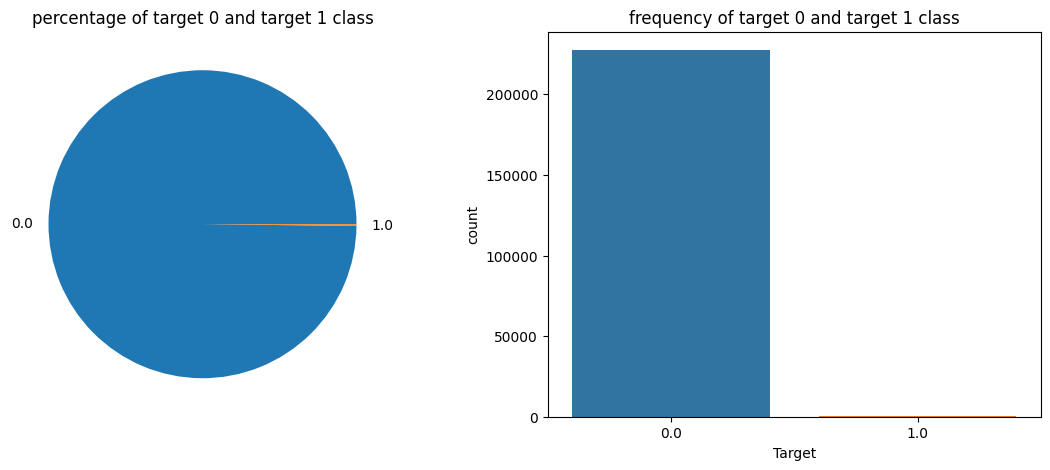

In [62]:
# now looking at this data we do see that there is a significant amount of imbalance in our data, and
# it is important to address this problem.
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.pie(x=total_data["Target"].value_counts(),labels=total_data["Target"].value_counts().index)
plt.title("percentage of target 0 and target 1 class")
plt.subplot(1,2,2)
sns.countplot(total_data,x="Target")
plt.title("frequency of target 0 and target 1 class")
plt.show()

In [63]:
total_data["Target"].value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [64]:
# the situtaion here is really bad with merely 394 records belonging to minority class, that is class 1
# while a whopping 227451 records belong to class 0, the majority class.

In [65]:
# now we can approach via many ways addressing this problem including majority undersampling methods,
# minority oversampling methods, using ensemble learning etc. however we are prohibited by the
# stakeholders into using such methods hence the only option we are left with is to use different
# evaluation metrics to check for the performance of the model, that is in this case we are not going
# to rely on the accuracy of our model rather we are going to rely on confusion matrix and more
# importantly classification report that will tell us the precision, recall, f1-score etc which are the
# appropriate evaluation metrics over here.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11076\638949739.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(total_data.corr(),annot=True,fmt="0.2f",linewidth=1,linecolor="black")


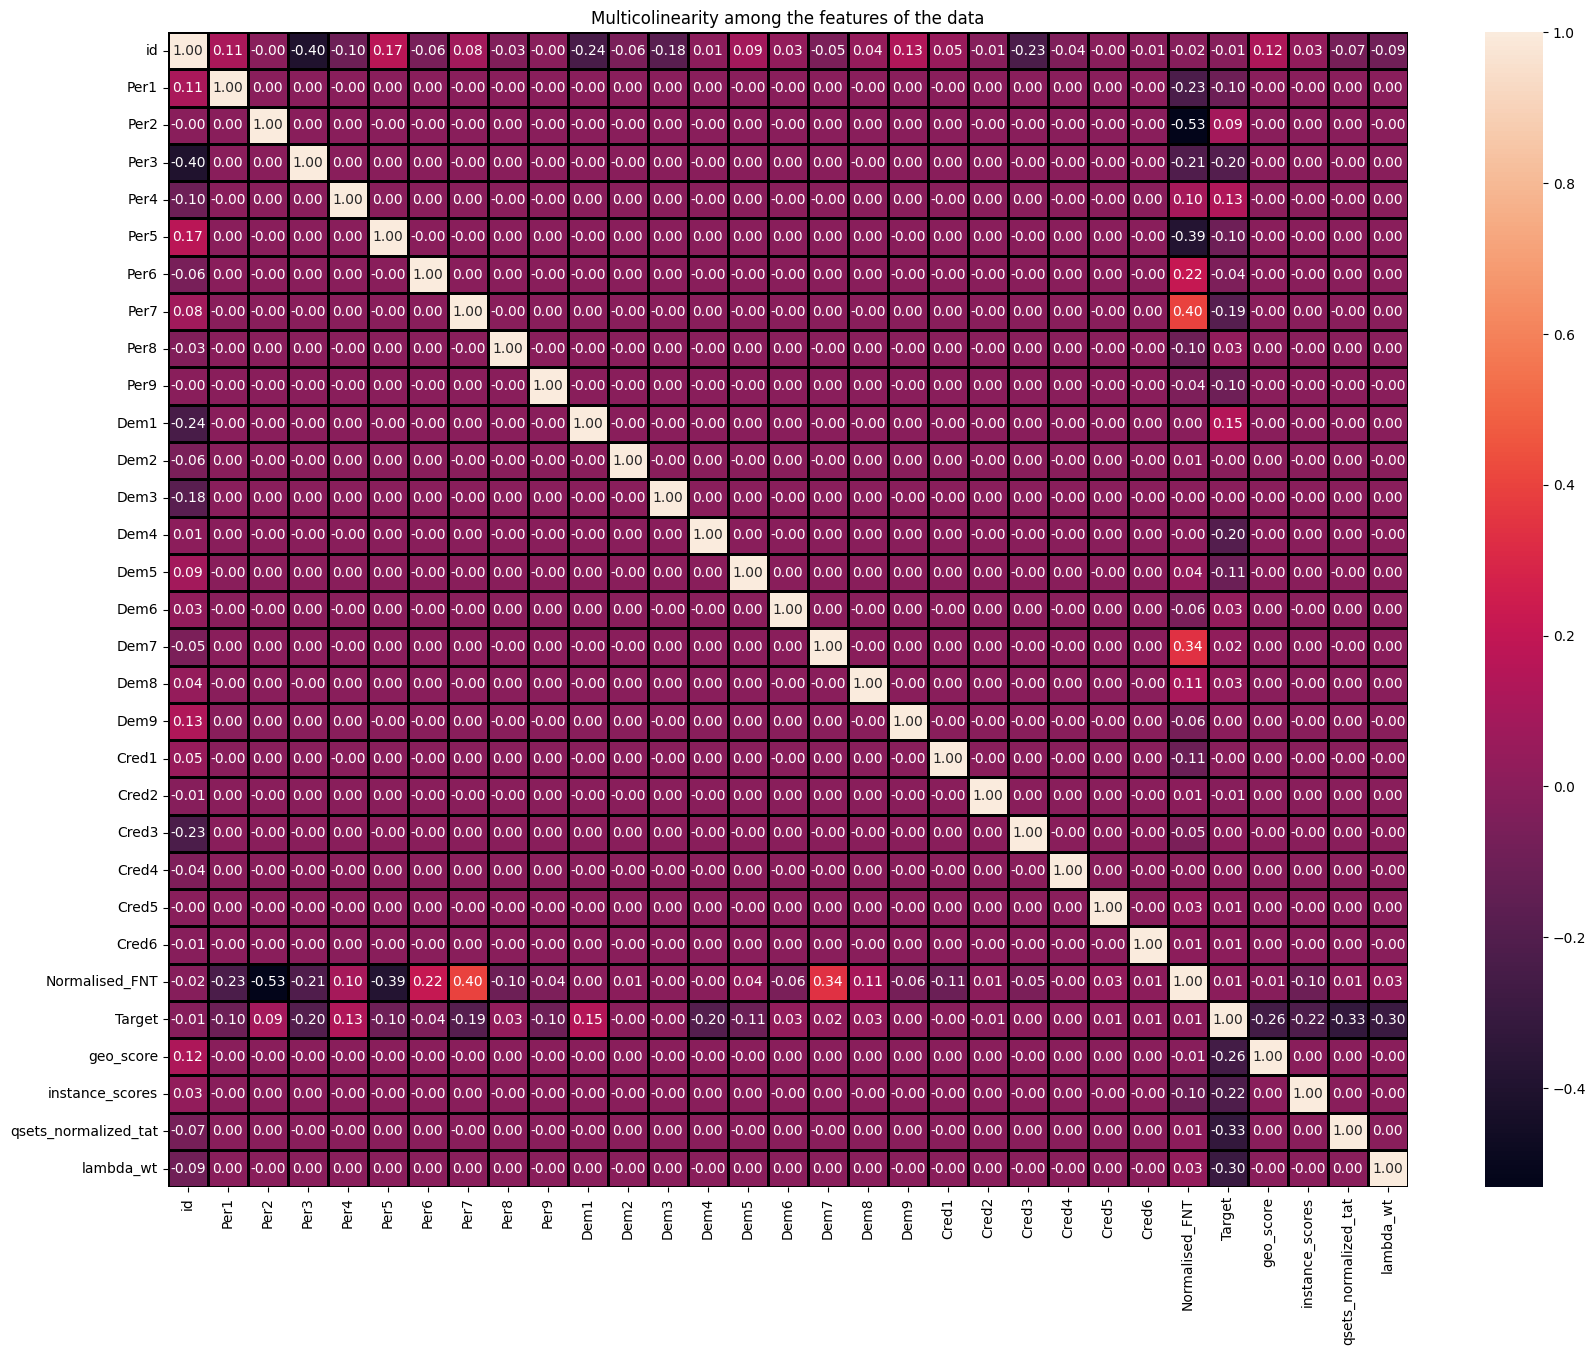

In [66]:
# now lets check for multicolinearity in our dataset using the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(total_data.corr(),annot=True,fmt="0.2f",linewidth=1,linecolor="black")
plt.title("Multicolinearity among the features of the data")
plt.show()

In [67]:
# we do not see any significant correlation to worry about among the features of the data hence we are
# good to move ahead.

In [68]:
# moving ahead we are mostly done with our processing so lets separate the train and test again.
train=total_data[total_data["data"]=="train"]
test=total_data[total_data["data"]=="test"]

In [69]:
# now lets split the train and test data into independent and dependent features,
# from independent features data we drop target as that is our dependent feature, data as that is not
# required, id and group as that will in no way assist our model into learning and hence are not
# required.
x_train=train.drop(["data","Target","id","Group"],axis="columns")
y_train=train[["Target"]]
x_test=test.drop(["data","Target","id","Group"],axis="columns")

In [70]:
# now going ahead we are going to use various machine learning algorithms some which are going to be
# probabilistic models such as naive bayes, decision tree while some might be distance based such as
# K-Nearest Neighbors, in case of distance based models or neural network models it is mandatory to
# scale the features or else the model wont work properly though even if the we do not use such models
# it is generally a good practise to scale the features before feeding it to a model.
# hence before going further we scale the features
scaler=StandardScaler()
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.fit_transform(x_test)

In [71]:
# reconverting the data into dataframe
x_train1=pd.DataFrame(scaled_x_train)
x_test1=pd.DataFrame(scaled_x_test)

# 5. Modelling

In [72]:
# splitting into train and test set
x_train2,x_test2,y_train2,y_test2=train_test_split(x_train1,y_train,
                                                   train_size=0.7,test_size=0.3,
                                                   random_state=101)

## Logistic Regression

In [73]:
# first lets start with Logistic Regression
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train2,y_train2)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [74]:
# predictions via Logistic Rgression model
y_pred_logit_train=logit.predict(x_train2)
y_pred_logit_test=logit.predict(x_test2)

In [75]:
# Evaluating the model via classification report, confusion matrix and accuracy score

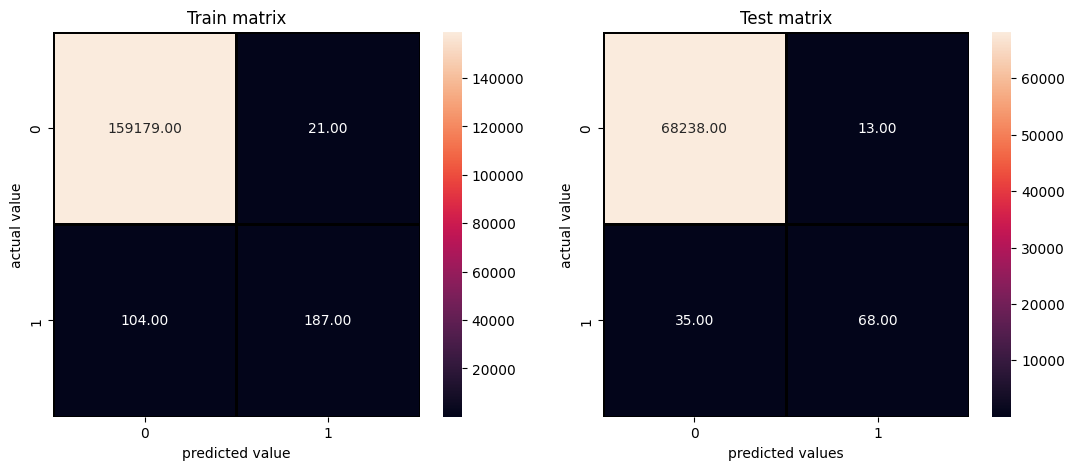

In [76]:
# confusion matrix
cm_train=confusion_matrix(y_train2,y_pred_logit_train)
cm_test=confusion_matrix(y_test2,y_pred_logit_test)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train,cmap="rocket",annot=True,fmt="0.2f",linewidth=1,linecolor="black")
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.title("Train matrix")
plt.subplot(1,2,2)
sns.heatmap(cm_test,cmap="rocket",annot=True,fmt="0.2f",linewidth=1,linecolor="black")
plt.xlabel("predicted values")
plt.ylabel("actual value")
plt.title("Test matrix")
plt.show()

In [77]:
# classification report
print("Train classification report:")
print(classification_report(y_train2,y_pred_logit_train))
print()
print("Test classification report:")
print(classification_report(y_test2,y_pred_logit_test))

Train classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    159200
         1.0       0.90      0.64      0.75       291

    accuracy                           1.00    159491
   macro avg       0.95      0.82      0.87    159491
weighted avg       1.00      1.00      1.00    159491


Test classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68251
         1.0       0.84      0.66      0.74       103

    accuracy                           1.00     68354
   macro avg       0.92      0.83      0.87     68354
weighted avg       1.00      1.00      1.00     68354



In [78]:
# accuracy score
print("Train accuracy:")
print(accuracy_score(y_train2,y_pred_logit_train))
print()
print("Test accuracy:")
print(accuracy_score(y_test2,y_pred_logit_test))

Train accuracy:
0.9992162567166799

Test accuracy:
0.9992977733563507


In [79]:
# here we see that we have very good accuracy score, however since our data is imbalanced we cannot
# trust the accuracy rather we consider classification report as our evaluation metric and from their
# we infer that our model is moderate not too good neither too bad as we get very great precison,
# recall and f1-score for class 0 but for our class 1 the precision recall and the f1-score drop quite
# significantly.

## Decision Tree

In [80]:
# lets move ahead to our next model that is Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train2,y_train2)

DecisionTreeClassifier(criterion='entropy')

In [81]:
# predictions via Decision Tree model
y_pred_dt_train=dt.predict(x_train2)
y_pred_dt_test=dt.predict(x_test2)

In [82]:
# Evaluating the model via classification report, confusion matrix and accuracy score

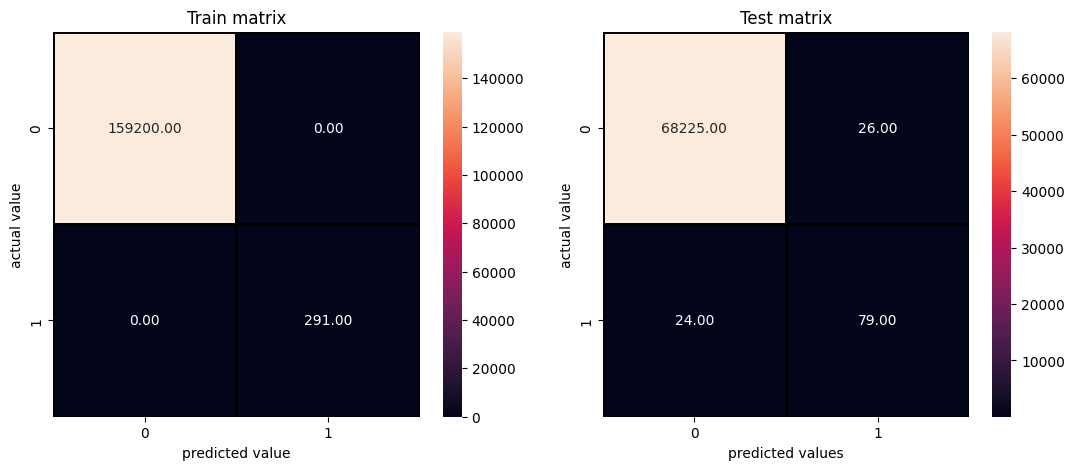

In [83]:
# confusion matrix
cm_train_dt=confusion_matrix(y_train2,y_pred_dt_train)
cm_test_dt=confusion_matrix(y_test2,y_pred_dt_test)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train_dt,cmap="rocket",annot=True,fmt="0.2f",linewidth=1,linecolor="black")
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.title("Train matrix")
plt.subplot(1,2,2)
sns.heatmap(cm_test_dt,cmap="rocket",annot=True,fmt="0.2f",linewidth=1,linecolor="black")
plt.xlabel("predicted values")
plt.ylabel("actual value")
plt.title("Test matrix")
plt.show()

In [84]:
# classification report
print("Train classification report:")
print(classification_report(y_train2,y_pred_dt_train))
print()
print("Test classification report:")
print(classification_report(y_test2,y_pred_dt_test))

Train classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    159200
         1.0       1.00      1.00      1.00       291

    accuracy                           1.00    159491
   macro avg       1.00      1.00      1.00    159491
weighted avg       1.00      1.00      1.00    159491


Test classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68251
         1.0       0.75      0.77      0.76       103

    accuracy                           1.00     68354
   macro avg       0.88      0.88      0.88     68354
weighted avg       1.00      1.00      1.00     68354



In [85]:
# accuracy score
print("Train accuracy:")
print(accuracy_score(y_train2,y_pred_dt_train))
print()
print("Test accuracy:")
print(accuracy_score(y_test2,y_pred_dt_test))

Train accuracy:
1.0

Test accuracy:
0.9992685139128654


In [86]:
# lets try with the criterion as gini in the Decsion Tree
dt1=DecisionTreeClassifier(criterion="gini")
dt1.fit(x_train2,y_train2)

DecisionTreeClassifier()

In [87]:
# predictions via the model
y_pred_dt1_train=dt1.predict(x_train2)
y_pred_dt1_test=dt1.predict(x_test2)

In [88]:
# lets check the classification report
print("Train classification report:")
print(classification_report(y_train2,y_pred_dt1_train))
print()
print("Test classification report:")
print(classification_report(y_test2,y_pred_dt1_test))

Train classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    159200
         1.0       1.00      1.00      1.00       291

    accuracy                           1.00    159491
   macro avg       1.00      1.00      1.00    159491
weighted avg       1.00      1.00      1.00    159491


Test classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68251
         1.0       0.70      0.81      0.75       103

    accuracy                           1.00     68354
   macro avg       0.85      0.90      0.87     68354
weighted avg       1.00      1.00      1.00     68354



In [89]:
# here also we see that using decision tree as well we get great accuracy but again we wont be trusting
# it as the data is imbalanced rather we go via classification report as our evaluation metric from
# that we infer that criterion as entropy is a better model also in the test set the precision and
# recall of our minority class that is class 1 is quite low even with criterion as entropy which was
# the better model so this model of decison tree is also quite moderate.

## Bagging

In [90]:
# lets try with bagging classifier with Decision Tree as the base model
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(base_estimator=dt,n_estimators=100,random_state=25)
bg.fit(x_train2,y_train2)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                  n_estimators=100, random_state=25)

In [91]:
# predictions via Bagging model with Decision Tree as the base model
y_pred_bg_train=bg.predict(x_train2)
y_pred_bg_test=bg.predict(x_test2)

In [92]:
# Evaluating the model via classification report and confusion matrix.

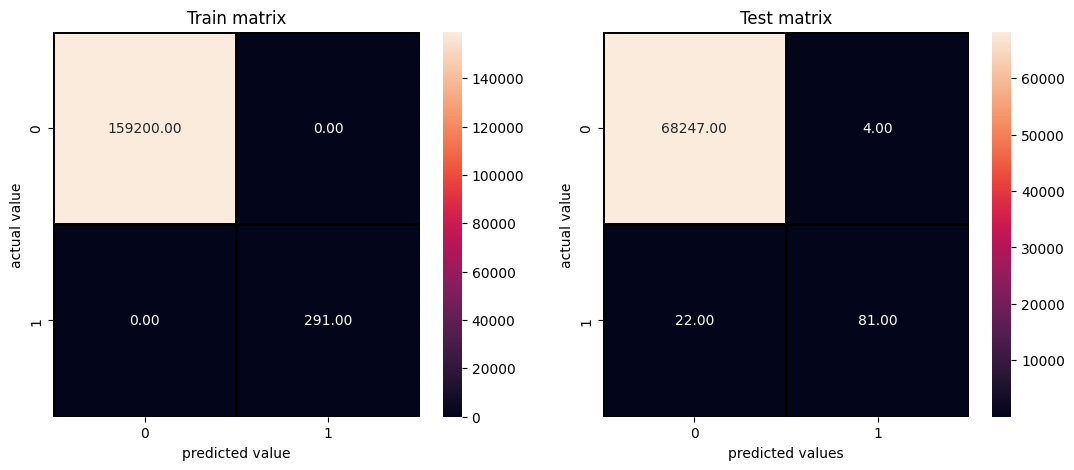

In [93]:
# confusion matrix
cm_train_bg=confusion_matrix(y_train2,y_pred_bg_train)
cm_test_bg=confusion_matrix(y_test2,y_pred_bg_test)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train_bg,cmap="rocket",annot=True,fmt="0.2f",linewidth=1,linecolor="black")
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.title("Train matrix")
plt.subplot(1,2,2)
sns.heatmap(cm_test_bg,cmap="rocket",annot=True,fmt="0.2f",linewidth=1,linecolor="black")
plt.xlabel("predicted values")
plt.ylabel("actual value")
plt.title("Test matrix")
plt.show()

In [94]:
# classification report
print("Train classification report:")
print(classification_report(y_train2,y_pred_bg_train))
print()
print("Test classification report:")
print(classification_report(y_test2,y_pred_bg_test))

Train classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    159200
         1.0       1.00      1.00      1.00       291

    accuracy                           1.00    159491
   macro avg       1.00      1.00      1.00    159491
weighted avg       1.00      1.00      1.00    159491


Test classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68251
         1.0       0.95      0.79      0.86       103

    accuracy                           1.00     68354
   macro avg       0.98      0.89      0.93     68354
weighted avg       1.00      1.00      1.00     68354



In [95]:
# here with the bagging classifier with Decision tree as the base model we see that we have got better
# results of precision, recall and f1-score of class 1 in test set which states that this model is
# better out of all we ran tests on till now.

## Random Forest

In [96]:
# now lets try Random Forest.
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train2,y_train2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11076\1922592446.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train2,y_train2)


RandomForestClassifier(random_state=1)

In [97]:
# predictions via Random Forest algorithm
y_pred_rf_train=rf.predict(x_train2)
y_pred_rf_test=rf.predict(x_test2)

In [98]:
# Evaluating the model via classification report and confusion matrix.

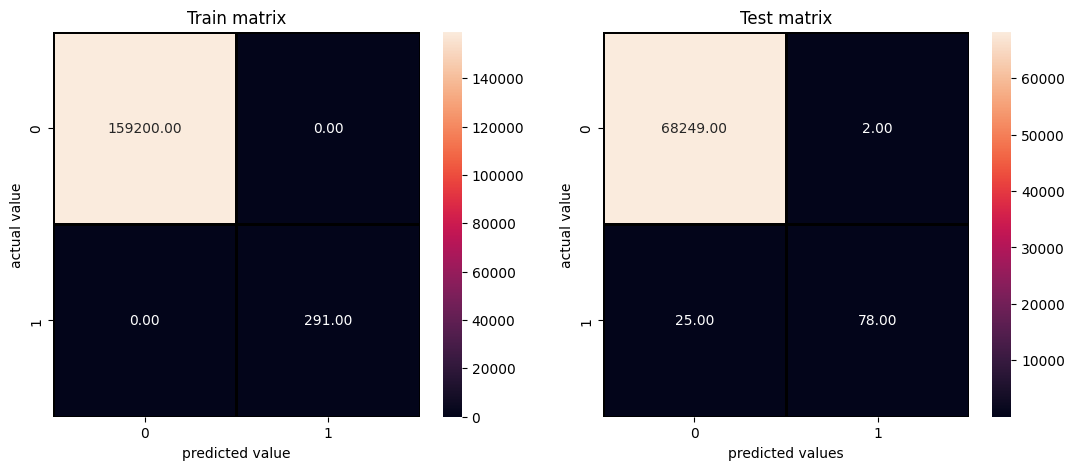

In [99]:
# confusion matrix
cm_train_rf=confusion_matrix(y_train2,y_pred_rf_train)
cm_test_rf=confusion_matrix(y_test2,y_pred_rf_test)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train_rf,cmap="rocket",annot=True,fmt="0.2f",linewidth=1,linecolor="black")
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.title("Train matrix")
plt.subplot(1,2,2)
sns.heatmap(cm_test_rf,cmap="rocket",annot=True,fmt="0.2f",linewidth=1,linecolor="black")
plt.xlabel("predicted values")
plt.ylabel("actual value")
plt.title("Test matrix")
plt.show()

In [100]:
# classification report
print("Train classification report:")
print(classification_report(y_train2,y_pred_rf_train))
print()
print("Test classification report:")
print(classification_report(y_test2,y_pred_rf_test))

Train classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    159200
         1.0       1.00      1.00      1.00       291

    accuracy                           1.00    159491
   macro avg       1.00      1.00      1.00    159491
weighted avg       1.00      1.00      1.00    159491


Test classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68251
         1.0       0.97      0.76      0.85       103

    accuracy                           1.00     68354
   macro avg       0.99      0.88      0.93     68354
weighted avg       1.00      1.00      1.00     68354



In [101]:
# here we see that the random forest has similar scores in the metrics as that of the previous model
# that is the Bagging model that is the precison, recall amd f1-score of class 1 is comparitvely better
# for the test set as compared to other models.

## Gradient Boosting

In [102]:
# lets try Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=1)
gb.fit(x_train2,y_train2)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=1)

In [103]:
# predictions via Gradient Boosting algorithm
y_pred_gb_train=gb.predict(x_train2)
y_pred_gb_test=gb.predict(x_test2)

In [104]:
# Evaluating the model via classification report and confusion matrix.

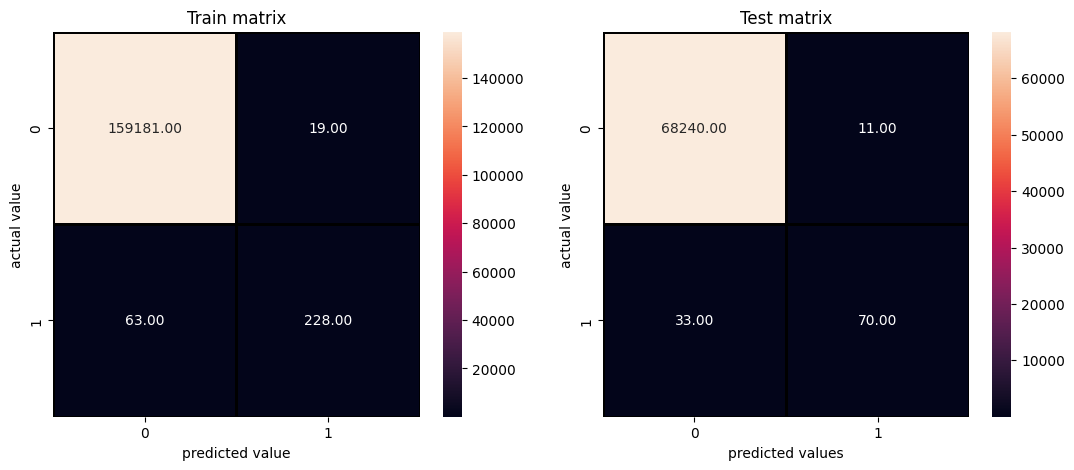

In [105]:
# confusion matrix
cm_train_gb=confusion_matrix(y_train2,y_pred_gb_train)
cm_test_gb=confusion_matrix(y_test2,y_pred_gb_test)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train_gb,cmap="rocket",annot=True,fmt="0.2f",linewidth=1,linecolor="black")
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.title("Train matrix")
plt.subplot(1,2,2)
sns.heatmap(cm_test_gb,cmap="rocket",annot=True,fmt="0.2f",linewidth=1,linecolor="black")
plt.xlabel("predicted values")
plt.ylabel("actual value")
plt.title("Test matrix")
plt.show()

In [106]:
# classification report
print("Train classification report:")
print(classification_report(y_train2,y_pred_gb_train))
print()
print("Test classification report:")
print(classification_report(y_test2,y_pred_gb_test))

Train classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    159200
         1.0       0.92      0.78      0.85       291

    accuracy                           1.00    159491
   macro avg       0.96      0.89      0.92    159491
weighted avg       1.00      1.00      1.00    159491


Test classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68251
         1.0       0.86      0.68      0.76       103

    accuracy                           1.00     68354
   macro avg       0.93      0.84      0.88     68354
weighted avg       1.00      1.00      1.00     68354



In [107]:
# we see that using the Gradient Boosting algorithm our metrics dropped even further than our benchmark
# model which was Logistic Regression, and that too not just in train, in test set as well, hence
# gradient boosting is not really good fit for the data.

## Ada Boost

In [108]:
# now lets go with Ada Boost
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(random_state=1)
adb.fit(x_train2,y_train2)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=1)

In [109]:
# predictions via Ada Boost algorithm
y_pred_adb_train=adb.predict(x_train2)
y_pred_adb_test=adb.predict(x_test2)

In [110]:
# Evaluating the model via classification report and confusion matrix.

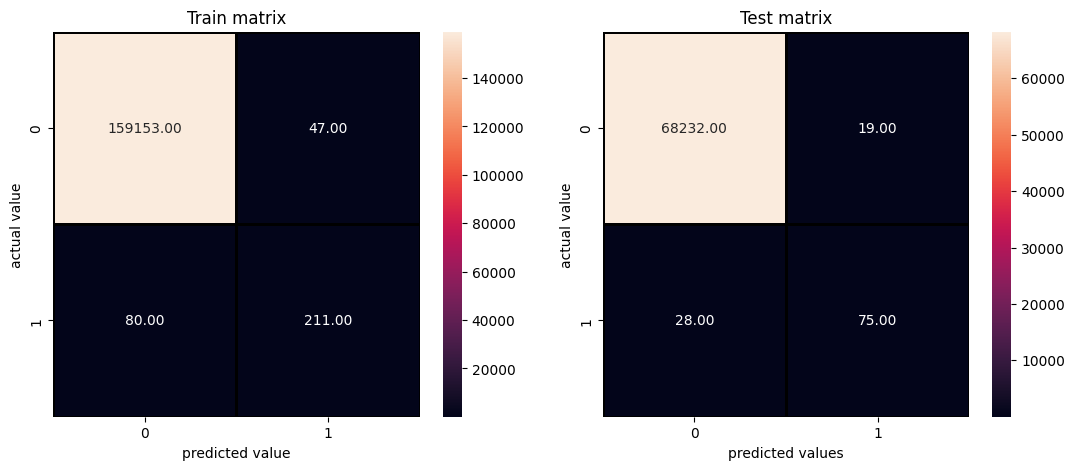

In [111]:
# confusion matrix
cm_train_adb=confusion_matrix(y_train2,y_pred_adb_train)
cm_test_adb=confusion_matrix(y_test2,y_pred_adb_test)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train_adb,cmap="rocket",annot=True,fmt="0.2f",linewidth=1,linecolor="black")
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.title("Train matrix")
plt.subplot(1,2,2)
sns.heatmap(cm_test_adb,cmap="rocket",annot=True,fmt="0.2f",linewidth=1,linecolor="black")
plt.xlabel("predicted values")
plt.ylabel("actual value")
plt.title("Test matrix")
plt.show()

In [112]:
# classification report
print("Train classification report:")
print(classification_report(y_train2,y_pred_adb_train))
print()
print("Test classification report:")
print(classification_report(y_test2,y_pred_adb_test))

Train classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    159200
         1.0       0.82      0.73      0.77       291

    accuracy                           1.00    159491
   macro avg       0.91      0.86      0.88    159491
weighted avg       1.00      1.00      1.00    159491


Test classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68251
         1.0       0.80      0.73      0.76       103

    accuracy                           1.00     68354
   macro avg       0.90      0.86      0.88     68354
weighted avg       1.00      1.00      1.00     68354



In [113]:
# we see that for both the train and test set the metrics that is precision, recall and f1-score all
# have low scores.

## XG-Boost

In [114]:
# now lets use XG-Boost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train2,y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [115]:
# predictions via XG-Boost algorithm
y_pred_xgb_train=xgb.predict(x_train2)
y_pred_xgb_test=xgb.predict(x_test2)

In [116]:
# Evaluating the model via classification report and confusion matrix.

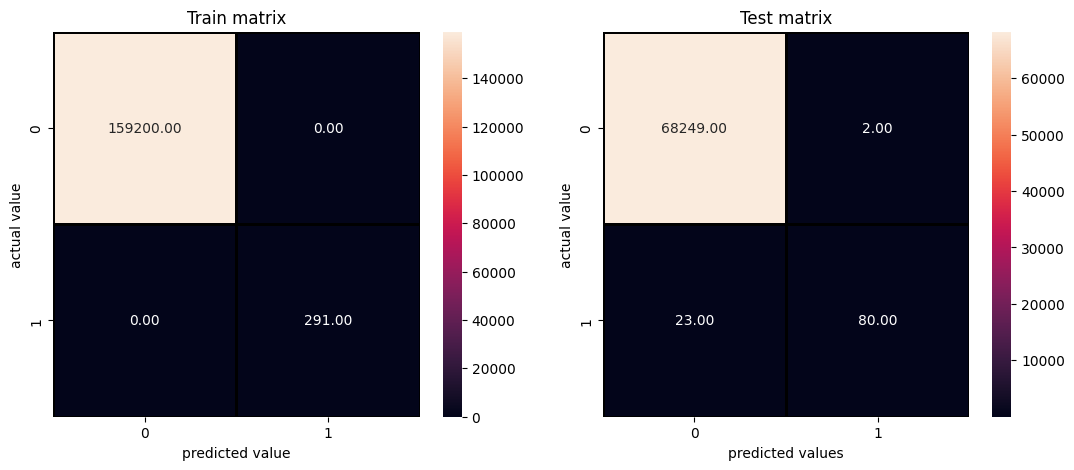

In [117]:
# confusion matrix
cm_train_xgb=confusion_matrix(y_train2,y_pred_xgb_train)
cm_test_xgb=confusion_matrix(y_test2,y_pred_xgb_test)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train_xgb,cmap="rocket",annot=True,fmt="0.2f",linewidth=1,linecolor="black")
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.title("Train matrix")
plt.subplot(1,2,2)
sns.heatmap(cm_test_xgb,cmap="rocket",annot=True,fmt="0.2f",linewidth=1,linecolor="black")
plt.xlabel("predicted values")
plt.ylabel("actual value")
plt.title("Test matrix")
plt.show()

In [118]:
# classification report
print("Train classification report:")
print(classification_report(y_train2,y_pred_xgb_train))
print()
print("Test classification report:")
print(classification_report(y_test2,y_pred_xgb_test))

Train classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    159200
         1.0       1.00      1.00      1.00       291

    accuracy                           1.00    159491
   macro avg       1.00      1.00      1.00    159491
weighted avg       1.00      1.00      1.00    159491


Test classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68251
         1.0       0.98      0.78      0.86       103

    accuracy                           1.00     68354
   macro avg       0.99      0.89      0.93     68354
weighted avg       1.00      1.00      1.00     68354



In [119]:
# here we again see that using XG-Boost has given the precision, recall and f1-score of class 1, the
# minority class give pretty good scores if we compare it to other models, so XG-Boost is a pretty good
# fit for the data as compared to others.

# Conclusion: Here we tested out multiple models one by one, we used different evaluation metrics to check for the performance of our model as the data is severely imbalanced and was prohibited from using methods like resampling, ensemble learning etc. however still we managed to find few pretty good models for the data these models include bagging classifier with decision tree as the base model and with 100 estimators, random forest again with 100 estimators and finally XG-Boost.